<img src="kschool.png" width="120" height="120" align="right"/>

# Librería _surprise_ de Python

https://surprise.readthedocs.io/en/stable/getting_started.html

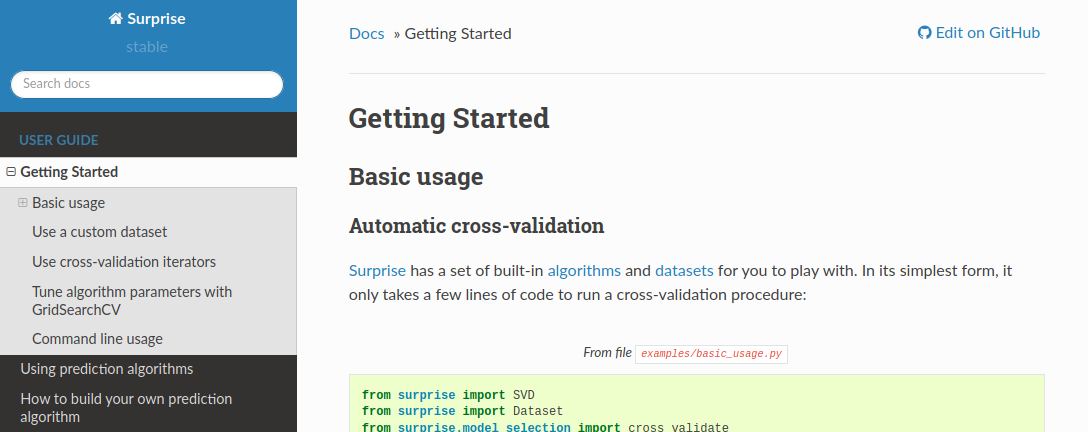

http://surpriselib.com/

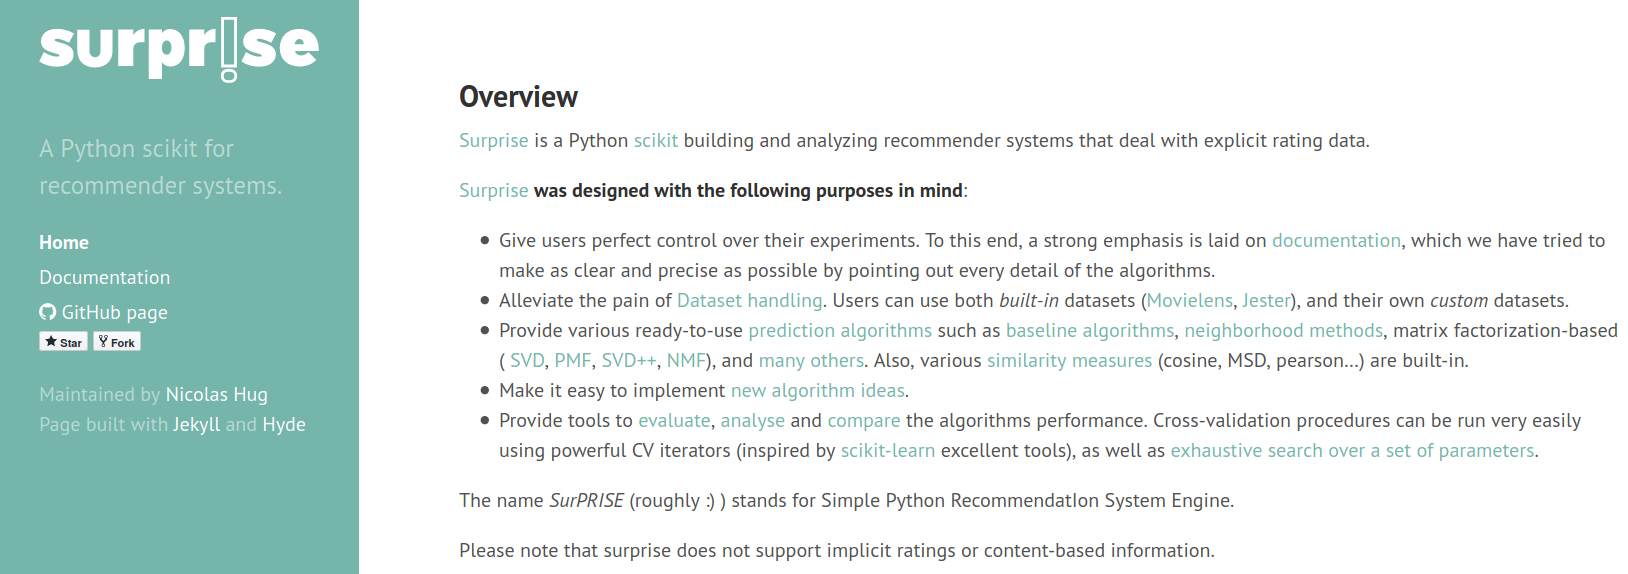

In [7]:
# !pip install surprise

##### Ejemplo inicial

In [14]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k', prompt=False)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /home/eduardofernandez/.surprise_data/ml-100k
RMSE: 0.9458


0.9457527347187386

##### Pandas Dataset

In [23]:
# https://surprise.readthedocs.io/en/stable/getting_started.html

import pandas as pd

ratings_dict = {'itemID': [1, 1, 1, 2, 2],
                'userID': [9, 32, 2, 45, 'user_foo'],
                'rating': [3, 2, 4, 3, 1]}
df = pd.DataFrame(ratings_dict)

df.head()

,itemID,userID,rating
0,1,9,3
1,1,32,2
2,1,2,4
3,2,45,3
4,2,user_foo,1


In [26]:
# https://surprise.readthedocs.io/en/stable/getting_started.html#load-from-df-example

from surprise import Reader
from surprise import NormalPredictor
from surprise.model_selection import cross_validate

# Es necesario poner unos límites al rating
reader = Reader(rating_scale=(1, 5))

# Es necesario realizar una transformación de pandas a surprise
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

# Realizamos una predicción
cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([1.27018286, 1.61395801]),
 'test_mae': array([1.07102257, 1.57817615]),
 'fit_time': (0.00011706352233886719, 7.724761962890625e-05),
 'test_time': (9.083747863769531e-05, 5.125999450683594e-05)}

# Ejercicio

<div class  = "alert alert-success">

Realizar un entrenamiento con los siguientes algoritmos:

- KNN
- SVD

</div>